# Apartat (C): Analitzant Dades

In [2]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import scipy.stats
from numpy import sqrt

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('/Users/carlo/OneDrive/Escritorio/UNI/TERCERO/AP/archive (1)/data.csv')
data = dataset.values

x = data[:, [i for i in range(dataset.shape[1]) if i != 7]]
#x = data[:, [i for i in range(dataset.shape[1]-1)]]
y = data[:, 7]
print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (293, 14)
Dimensionalitat de les entrades X (293, 13)
Dimensionalitat de l'atribut Y (293,)


In [3]:
print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

Per comptar el nombre de valors no existents:
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64


In [4]:
print("Per visualitzar les primeres 5 mostres de la BBDD:")
dataset.head() 

Per visualitzar les primeres 5 mostres de la BBDD:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.000,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.000,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.000,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.000,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.000,?,?,?,0


In [5]:
print("Per veure estadístiques dels atributs numèrics de la BBDD:")
dataset.describe()

Per veure estadístiques dels atributs numèrics de la BBDD:


,age,sex,cp,trestbps,thalach,exang,oldpeak,num
count,293.000,293.000,293.000,293.000,293.000,293.000,293.000,293.000
mean,47.826,0.727,2.986,132.584,139.130,0.304,0.581,0.362
std,7.825,0.446,0.965,17.627,23.590,0.461,0.906,0.481
min,28.000,0.000,1.000,92.000,82.000,0.000,0.000,0.000
25%,42.000,0.000,2.000,120.000,122.000,0.000,0.000,0.000
50%,49.000,1.000,3.000,130.000,140.000,0.000,0.000,0.000
75%,54.000,1.000,4.000,140.000,155.000,1.000,1.000,1.000
max,66.000,1.000,4.000,200.000,190.000,1.000,5.000,1.000


<IPython.core.display.Javascript object>


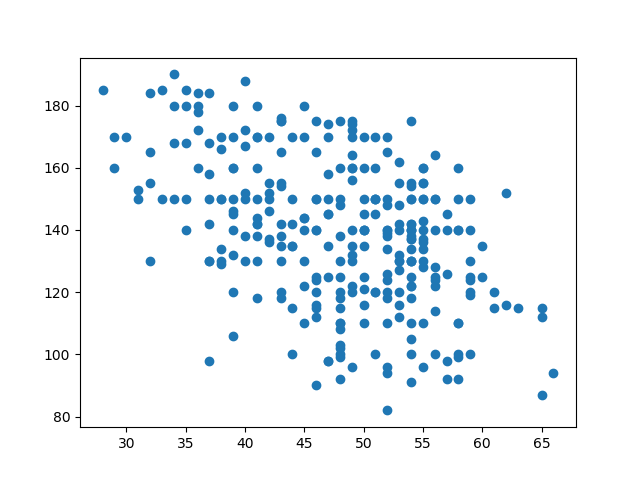

In [6]:
# mostrem atribut 0, l'age, contra el thalach
plt.figure()

ax = plt.scatter(x[:,0], y)

<IPython.core.display.Javascript object>


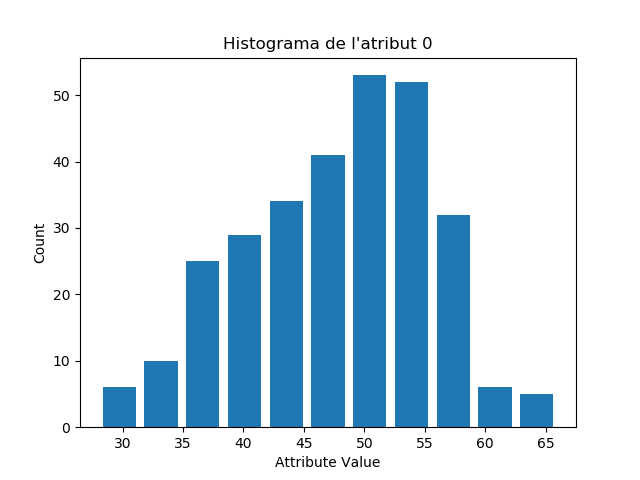

In [7]:
plt.figure()
plt.title("Histograma de l'atribut 0")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,0], bins=11, range=[np.min(x[:,0]), np.max(x[:,0])], histtype="bar", rwidth=0.8)

In [8]:
dataset = dataset.replace({"?":np.nan})
dataset = dataset.astype('float64')

for el in ["chol", "fbs", "restecg"]:
    dataset[el] = dataset[el].replace({np.nan:np.mean(dataset[el])})   #Substituïm els valors nulls per la mitja de l'atribut

dataset.drop('ca',inplace=True,axis=1) # Eliminem l'atribut "ca" perquè la majoria de valors són inexistents


També podem estudiar la correlació entre els diferents atributs per tal de saber si estan correlacionats entre ells.

<IPython.core.display.Javascript object>


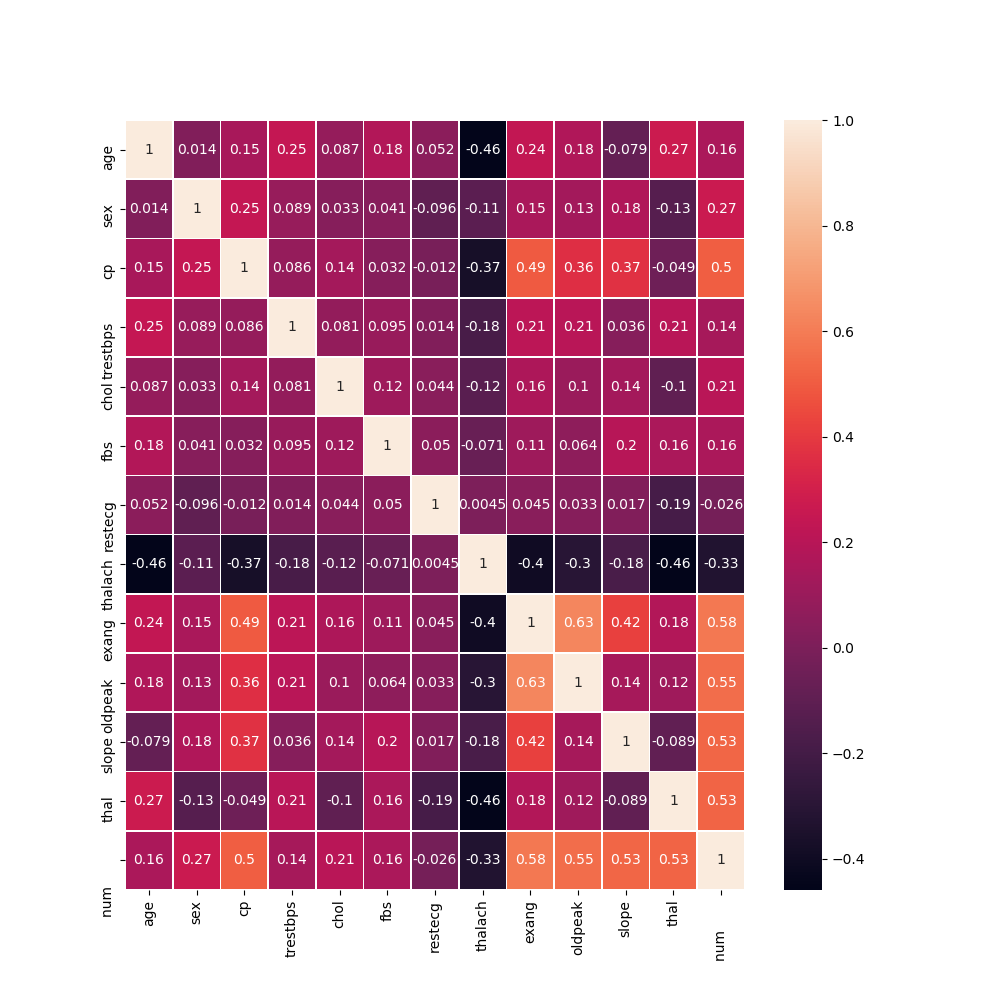

In [9]:
import seaborn as sns

# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

#plt.figure()

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
#sns.heatmap(dataset.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

ax = sns.heatmap(correlacio, annot=True, linewidths=0.5, ax=ax)

In [10]:
dataset.drop('slope',inplace=True,axis=1) 
dataset.drop('thal',inplace=True,axis=1) 
#Eliminem els atributs "slope" i el "thal" perquè resulta irrellevant degut a la falta de dades

In [11]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,293.000,293.000,293.000,293.000,293.000,293.000,293.000,293.000,293.000,293.000,293.000
mean,47.826,0.727,2.986,132.584,250.637,0.070,0.216,139.130,0.304,0.581,0.362
std,7.825,0.446,0.965,17.627,64.973,0.252,0.459,23.590,0.461,0.906,0.481
min,28.000,0.000,1.000,92.000,85.000,0.000,0.000,82.000,0.000,0.000,0.000
25%,42.000,0.000,2.000,120.000,211.000,0.000,0.000,122.000,0.000,0.000,0.000
50%,49.000,1.000,3.000,130.000,248.000,0.000,0.000,140.000,0.000,0.000,0.000
75%,54.000,1.000,4.000,140.000,277.000,0.000,0.000,155.000,1.000,1.000,1.000
max,66.000,1.000,4.000,200.000,603.000,1.000,2.000,190.000,1.000,5.000,1.000


També podem utilitzar la funció pairplot per tal de veure els atributs que estan relacionats entre si.

<IPython.core.display.Javascript object>


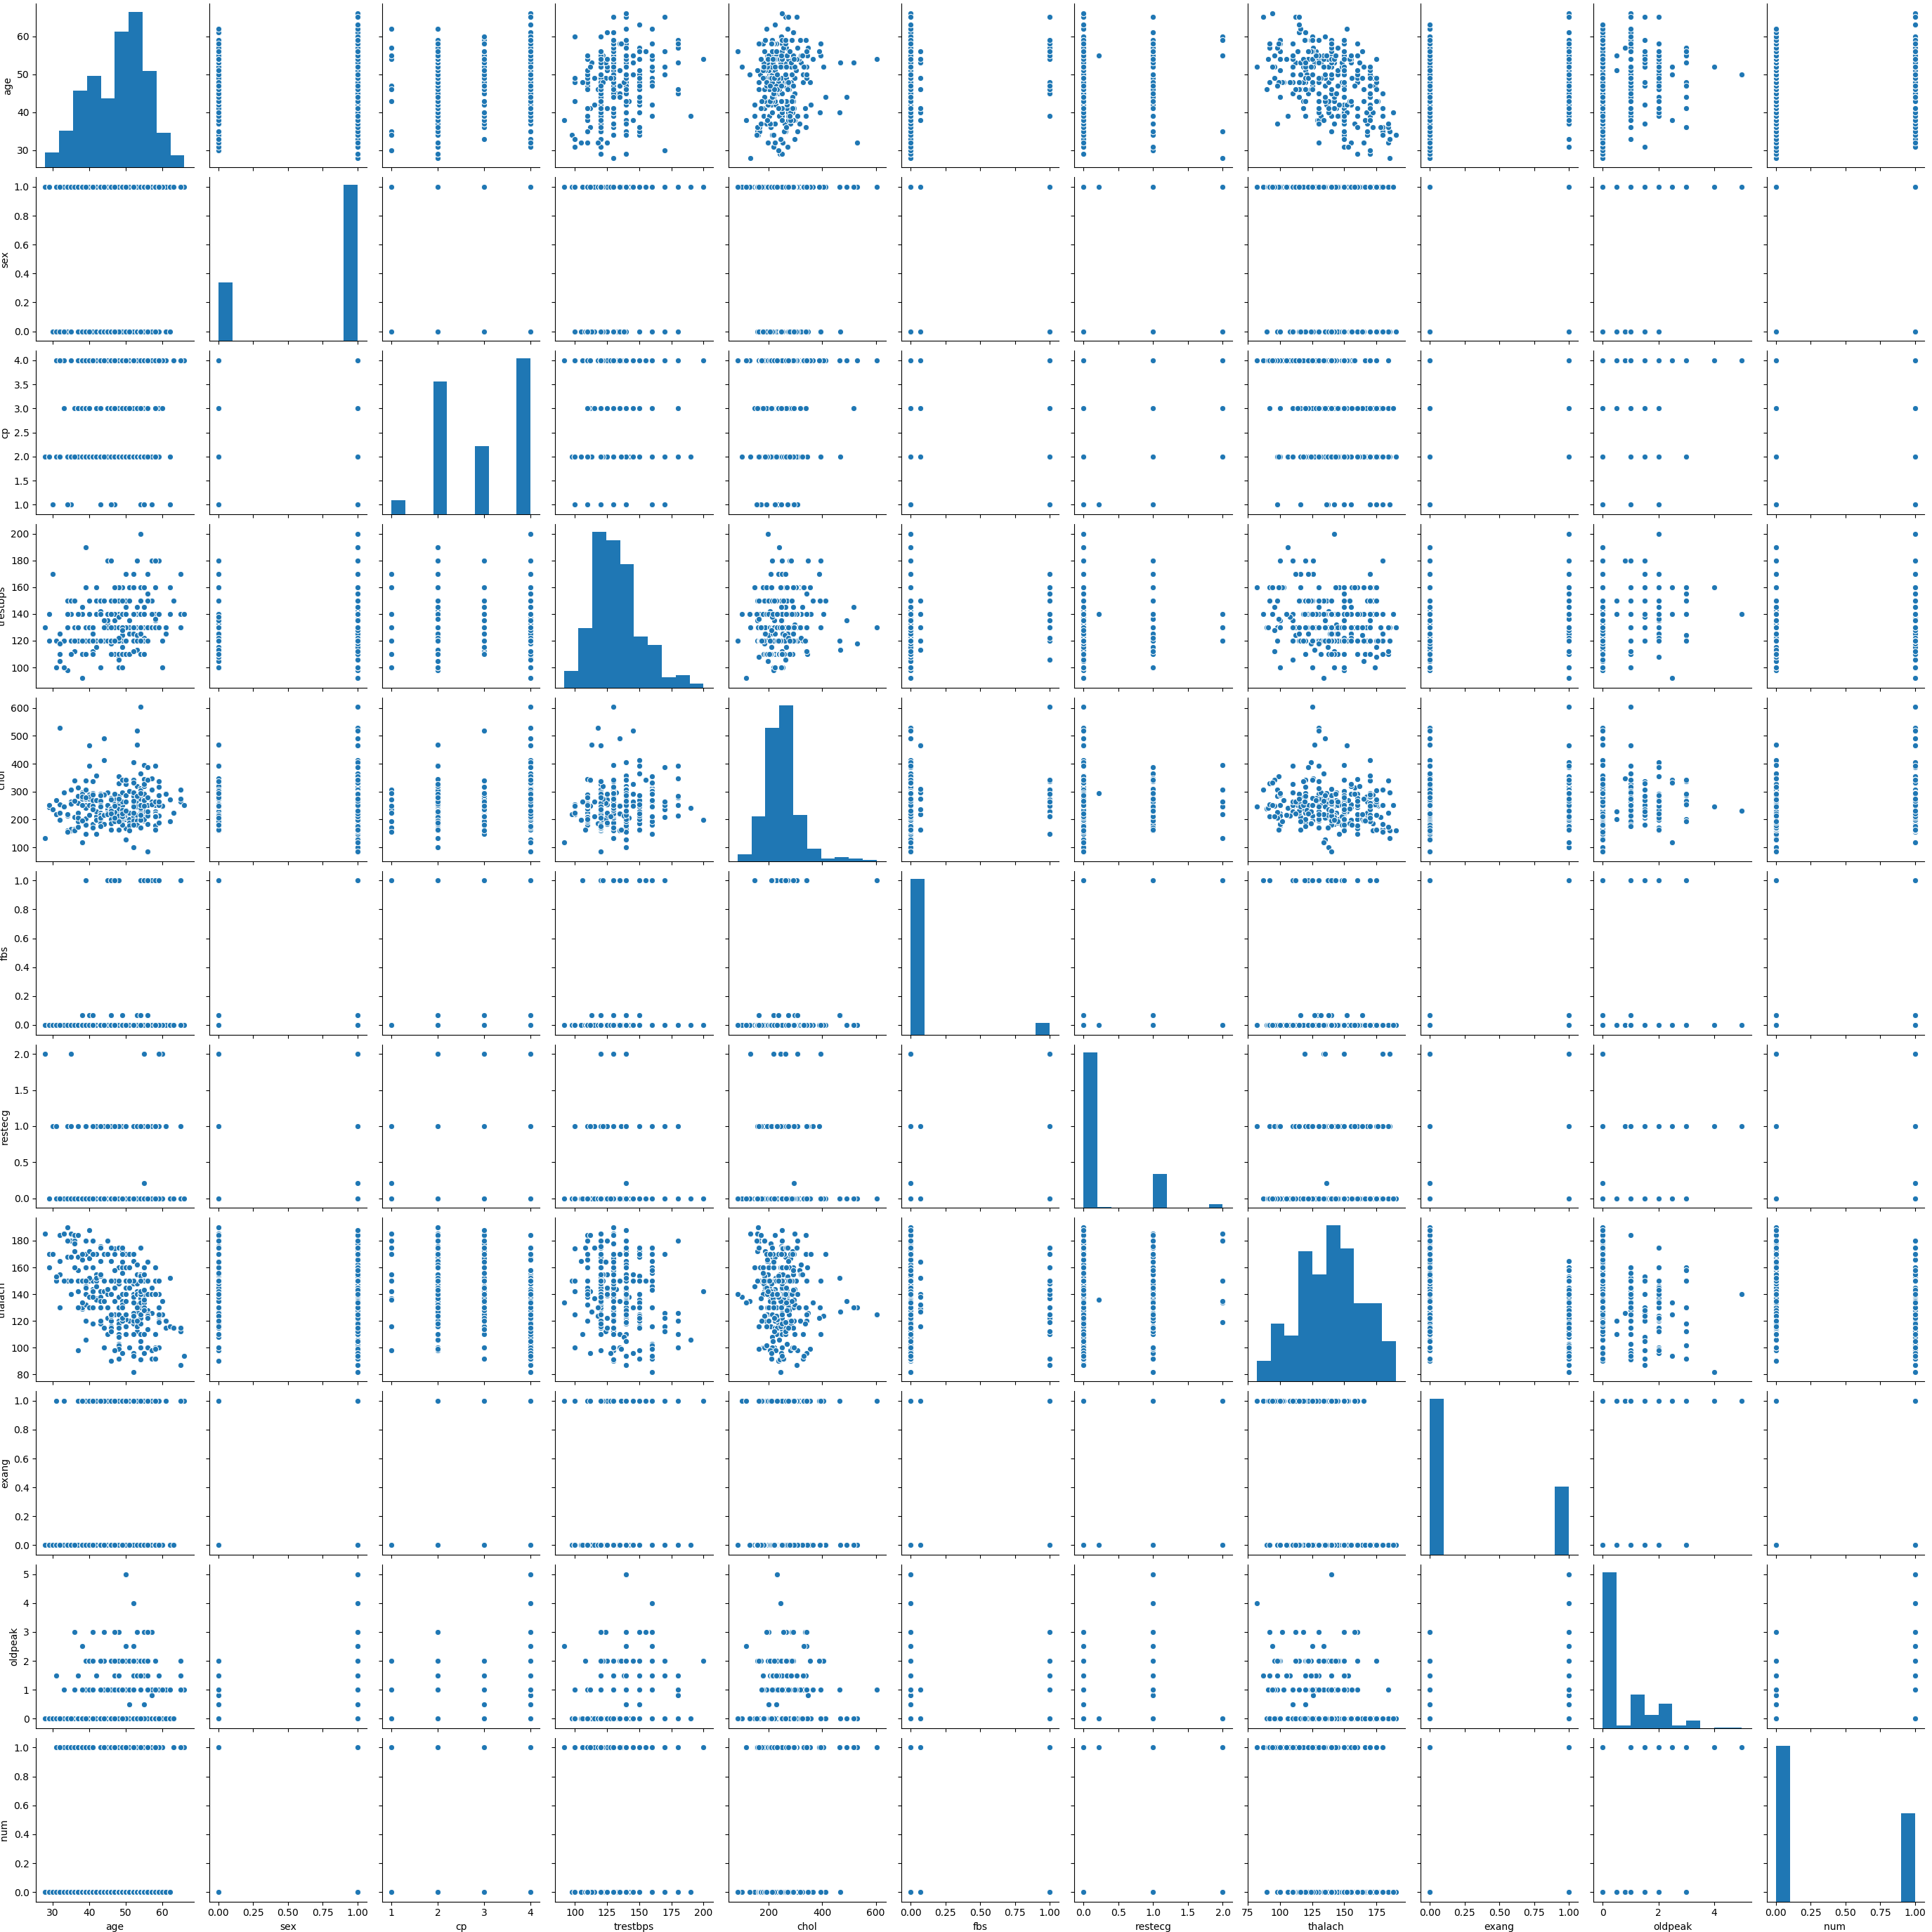

In [12]:
# Mirem la relació entre atributs utilitzant la funció pairplot
relacio = sns.pairplot(dataset)

# Apartat (B): Primeres regressions

Per a aquest primer apartat es calcularà l'error quadràtic mitjà només del regressor per a cada un dels atributs de la base de dades, determinant aquell atribut pel qual l'error quadràtic mitjà (entre el valor predit i el real, per a cada mostra) és més baix.

In [13]:
dataset = dataset.rename(columns={'num       ': 'num'})

In [14]:
import math
def mse(y1, y2):
    # comprovem que y1 i y2 tenen la mateixa mida
    assert(len(y1) == len(y2))
    mse = 0
    for i in range(len(y1)):
        mse += (y1[i] - y2[i])**2
    return mse / len(y1)

Per a la regressió podeu utilitzar la llibreria sklearn:

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def regression(x, y, degree = 1):
    # Creem un objecte de regressió de sklearn
    if degree == 1:
        regr = LinearRegression()
    else:
        regr = make_pipeline(PolynomialFeatures(degree),LinearRegression())
        
    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

In [16]:
y = np.array(dataset.thalach)

#Mostrem el valor del mean squared error per a cadascun dels notres atributs
for el in [el for el in dataset if el != "thalach"]:   # No utilitzem aquests argument perquè és l'objectiu
    x = np.array(dataset[el]).reshape((-1, 1))
    fit1=regression(x, y)
    print(mse(y, fit1.predict(x)))

437.52420493542695
547.6475852841745
478.47495558171215
535.6045454413896
546.321742450225
551.7710636716861
554.5659017934436
464.96428676160434
503.6526210664957
493.67269087369016


A continuació, es modificaran tots els atributs mitjançant **procediments de normalització (normal, estàndard)**, i s'avaluarà el rendiment del regressor après.

In [17]:
def standarize(x_train):
    mean = [x_train[i].mean() for i in x_train]
    std = [x_train[i].std() for i in x_train]
    for i in range(x_train.shape[1]):
        x_train.iloc[:,i] = (x_train.iloc[:,i] - mean[i])/std[i]
    return x_train

<IPython.core.display.Javascript object>


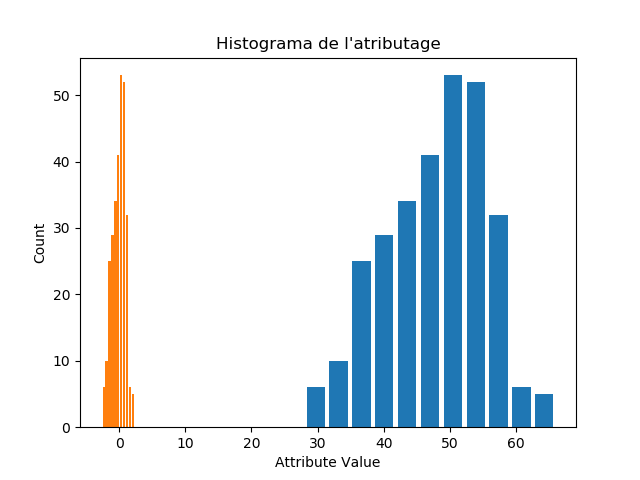

<IPython.core.display.Javascript object>


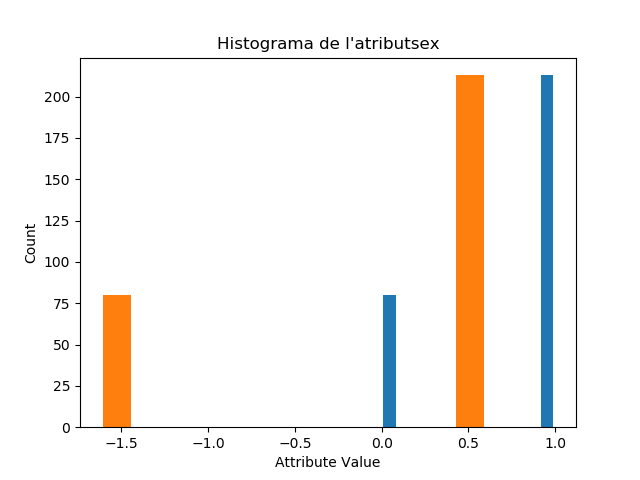

<IPython.core.display.Javascript object>


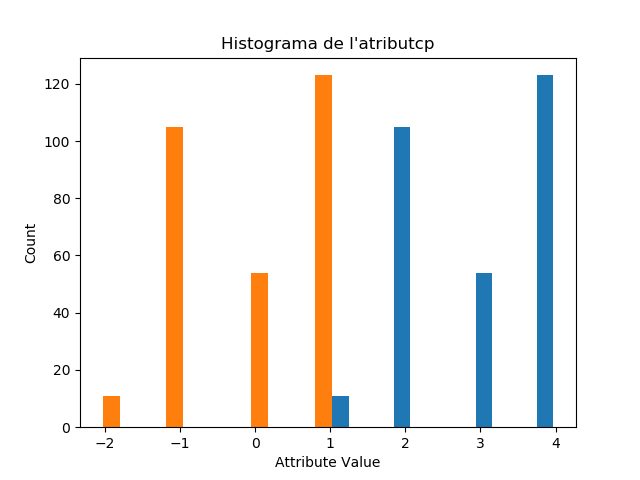

<IPython.core.display.Javascript object>


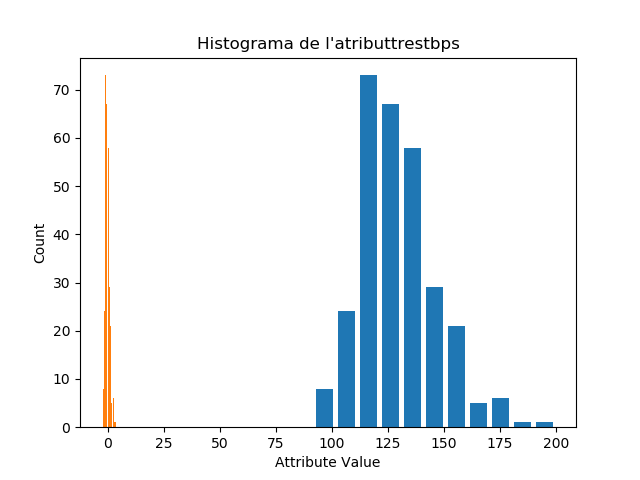

<IPython.core.display.Javascript object>


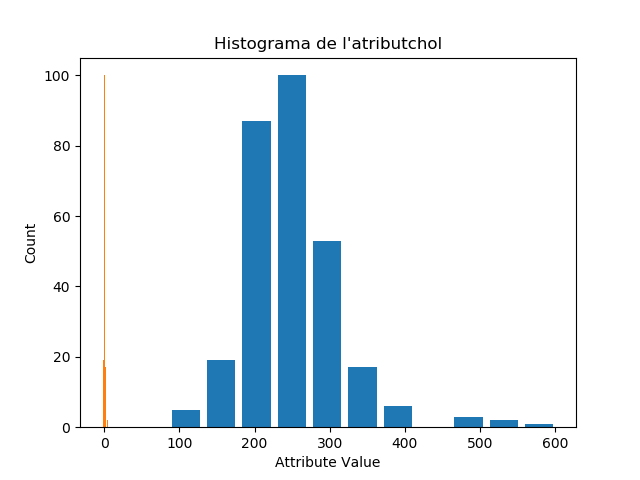

<IPython.core.display.Javascript object>


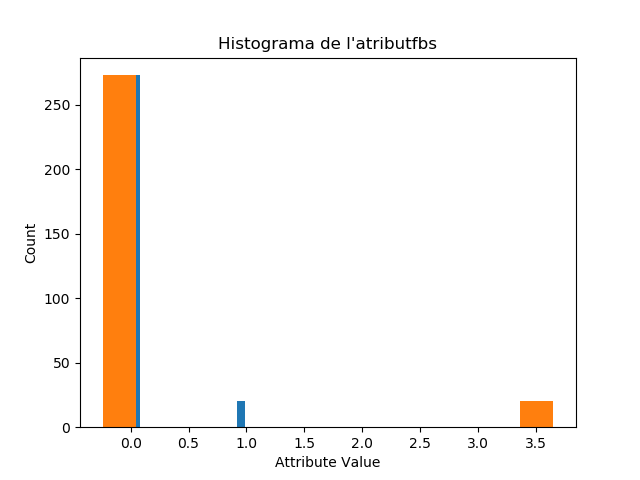

<IPython.core.display.Javascript object>


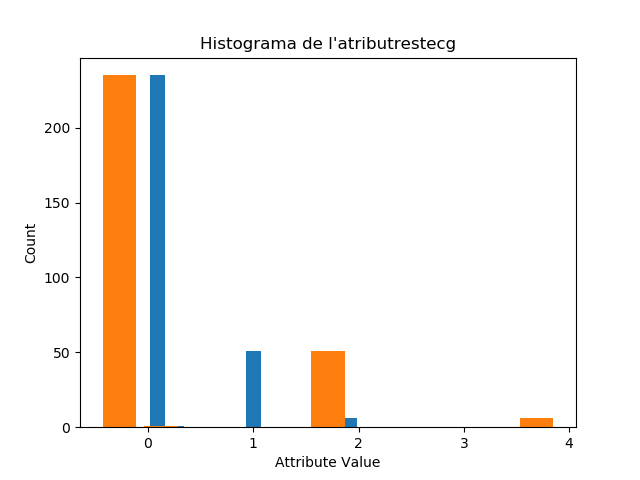

<IPython.core.display.Javascript object>


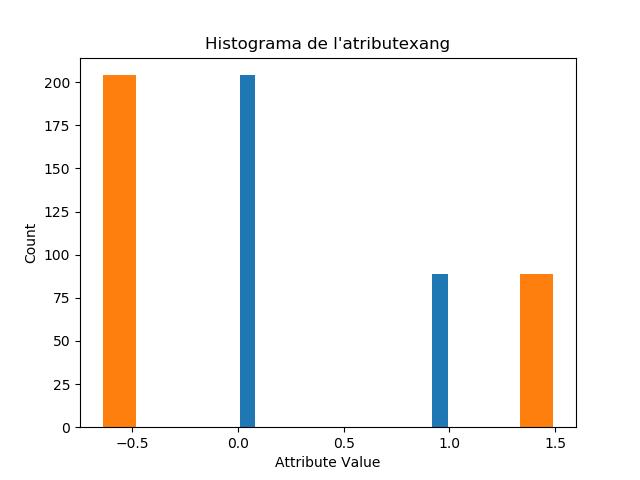

<IPython.core.display.Javascript object>


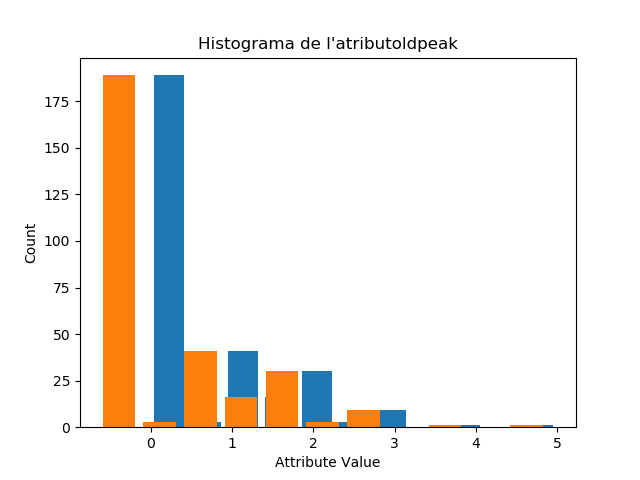

<IPython.core.display.Javascript object>


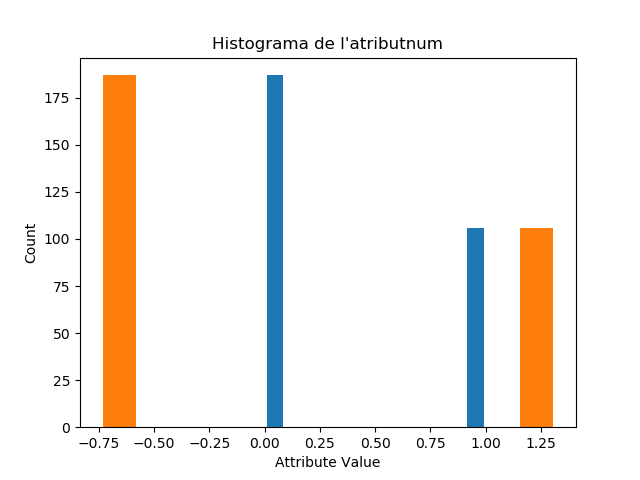

In [18]:
dataset2 = dataset.copy()
dataset2 = standarize(dataset2)
y = dataset["thalach"].values
y_stand = dataset2["thalach"].values
dataset.drop('thalach',inplace=True,axis=1) 
dataset2.drop('thalach',inplace=True,axis=1) 

x = dataset.values
x_stand = dataset2.values

cols = [i for i in dataset2.columns.values]
for i in range(len(cols)):
    plt.figure()
    plt.title("Histograma de l'atribut" + str(cols[i]))
    plt.xlabel("Attribute Value")
    plt.ylabel("Count")
    hist = plt.hist(x[:,i], bins=11, range=[np.min(x[:,i]), np.max(x[:,i])], histtype="bar", rwidth=0.8)
    hist = plt.hist(x_stand[:,i], bins=11, range=[np.min(x_stand[:,i]), np.max(x_stand[:,i])], histtype="bar", rwidth=0.8)

In [19]:
dataset2.drop('sex',inplace=True,axis=1)
dataset2.drop('cp',inplace=True,axis=1)
dataset2.drop('fbs',inplace=True,axis=1)
dataset2.drop('restecg',inplace=True,axis=1)
dataset2.drop('oldpeak',inplace=True,axis=1)
dataset2.drop('num',inplace=True,axis=1)

x_stand = dataset2.values
# Eliminem l'atribut "sex", "cp", fbs", "restecg", "oldpeak" i "num" perquè no segueixen una distribució Gaussiana

<IPython.core.display.Javascript object>


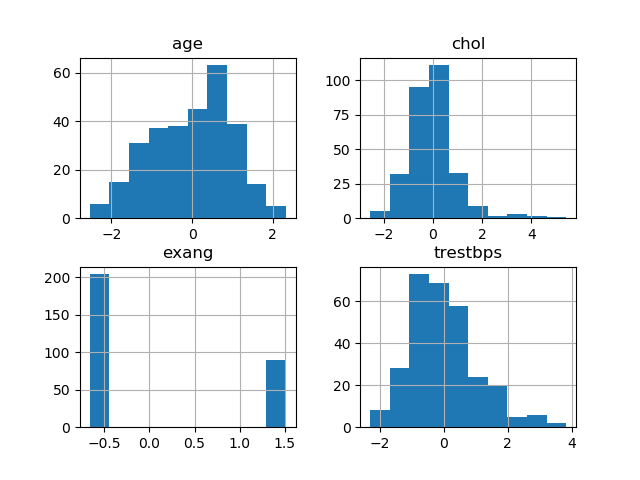

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AAAB987FC8>,
      dtype=object)

In [20]:
dataset2.hist()

Ara que hem carregat les dades podem entrenar un regressor lineal per a aproximar la funció que les genera:

<IPython.core.display.Javascript object>


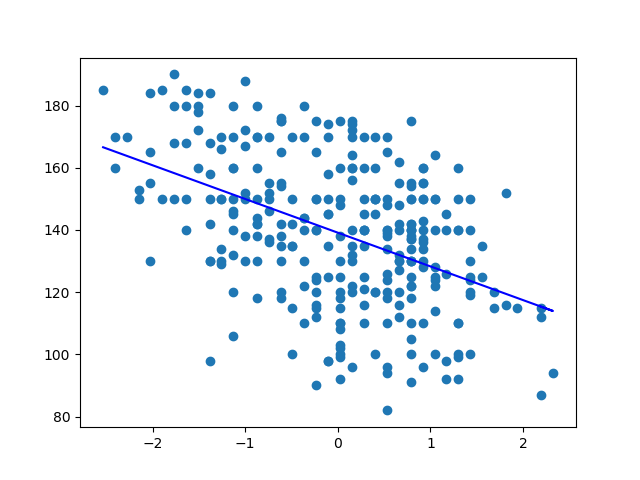

<IPython.core.display.Javascript object>


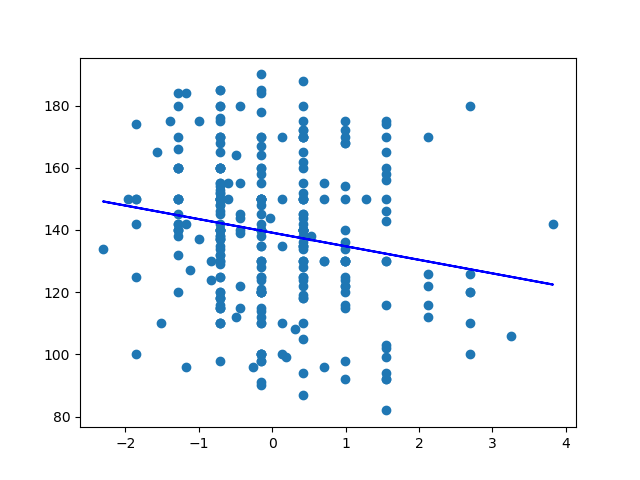

<IPython.core.display.Javascript object>


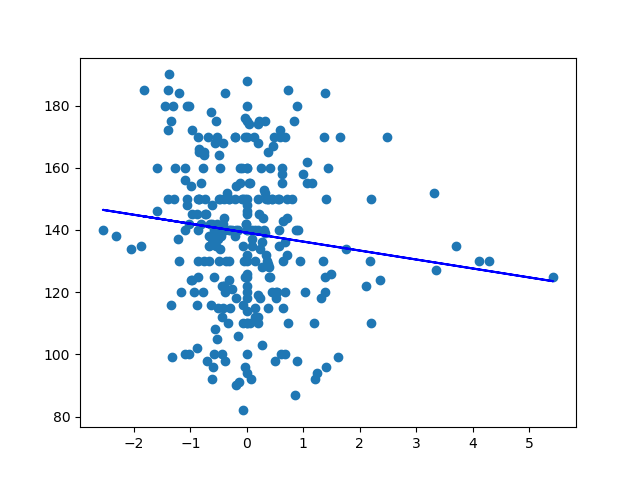

<IPython.core.display.Javascript object>


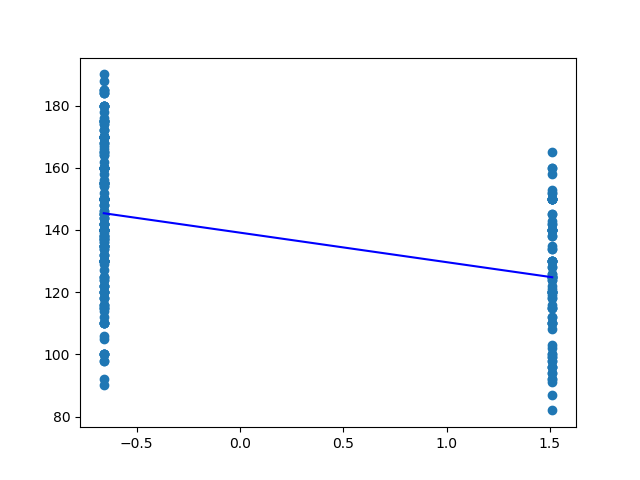

R2 score:  0.2110668560019705
R2 score:  0.03421074032446991
R2 score:  0.014885747933992999
R2 score:  0.1615875591253917


In [21]:
from sklearn.metrics import r2_score
data2 = dataset2.values
degree = 1
r2=[]

for i in [i for i in range(len(list(dataset2.keys())))]:
    atribut1 = data2[:,i].reshape(data2.shape[0], 1)
    regr = regression(atribut1, y, degree) 
    predicted = regr.predict(atribut1)

    # Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
    plt.figure()
    ax = plt.scatter(atribut1, y)
    if degree == 1:
        plt.plot(atribut1, predicted, 'b')
    else:
        X_seq = np.linspace(x.min(),x.max(),300).reshape(-1,1)
        plt.plot(X_seq,regr.predict(X_seq),color="black")

    # Mostrem l'error (MSE i R2)
    r2.append(r2_score(y, predicted))

for i in range(0, len(r2)):
    print("R2 score: ", r2[i])

Error en atribut 0: 0.978585
R2 score en atribut 0: 0.040833

Error en atribut 1: 0.981349
R2 score en atribut 1: 0.038123

Error en atribut 2: 0.994320
R2 score en atribut 2: 0.025410

Error en atribut 3: 0.857737
R2 score en atribut 3: 0.159282



<IPython.core.display.Javascript object>


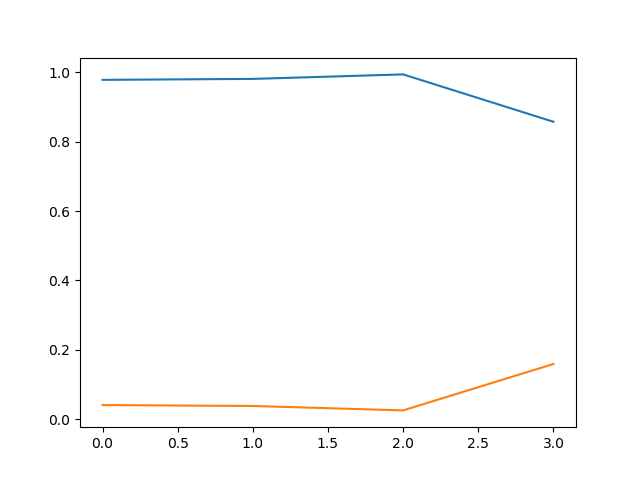

In [22]:
""" Per a assegurar-nos que el model s'ajusta be a dades noves, no vistes, 
cal evaluar-lo en un conjunt de validacio (i un altre de test en situacions reals).
Com que en aquest cas no en tenim, el generarem separant les dades en 
un 80% d'entrenament i un 20% de validació.
"""
def split_data(x, y, train_ratio=0.8):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:] 
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

# Dividim dades d'entrenament
x_train, y_train, x_val, y_val = split_data(x_stand, y_stand)
mses = []
r2s = []
for i in range(x_train.shape[1]):
    x_t = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v = x_val[:,i] # seleccionem atribut i en conjunt de val.
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))

    regr = regression(x_t, y_train)    
    error = mse(y_val, regr.predict(x_v)) # calculem error
    r2 = r2_score(y_val, regr.predict(x_v))
    mses.append(error)
    r2s.append(r2)
    print("Error en atribut %d: %f" %(i, error))
    print("R2 score en atribut %d: %f\n" %(i, r2))

    
fig = plt.figure()
plt.plot(mses)
plt.plot(r2s)
fig.show()

age - MSE: 0.979; R2: 0.041
trestbps - MSE: 0.981; R2: 0.038
chol - MSE: 0.994; R2: 0.025
exang - MSE: 0.858; R2: 0.159
PCA_1 - MSE: 0.790; R2: 0.225
PCA_2 - MSE: 0.828; R2: 0.188
PCA_3 - MSE: 0.803; R2: 0.213
PCA_4 - MSE: 0.824; R2: 0.193


C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


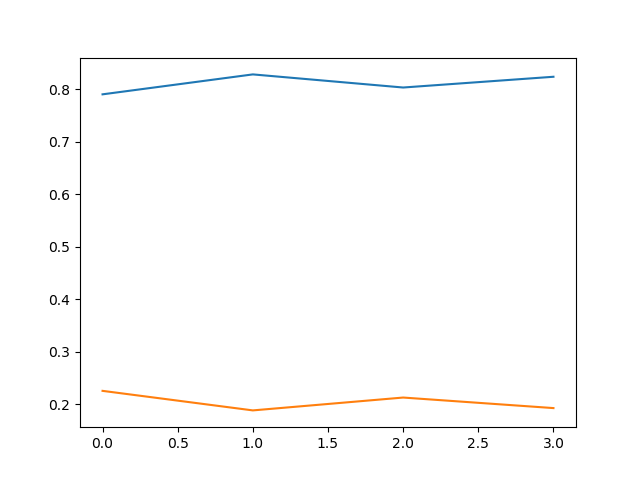

In [23]:
linear_model = LinearRegression()
for i in range(x_train.shape[1]):
        linear_model.fit(x_train[:, i].reshape(-1,1), y_train)
        preds = linear_model.predict(x_val[:, i].reshape(-1,1))
        print(f"{dataset2.columns[i]} - MSE: {mse(y_val, preds):.3f}; R2: {r2_score(y_val, preds):.3f}")


MSEs, r2s = [], []
for i in range(1, x_train.shape[1]+1):
    pca = PCA(i)
    x_train_PCA = pca.fit_transform(x_train)
    x_test_PCA = pca.transform(x_val)

    linear_model = LinearRegression()
    linear_model.fit(x_train_PCA, y_train)
    preds = linear_model.predict(x_test_PCA)

    MSE = mse(y_val, preds)
    r2 = r2_score(y_val, preds)
    print(f"PCA_{i} - MSE: {MSE:.3f}; R2: {r2:.3f}")
    
    MSEs.append(MSE)
    r2s.append(r2)
    
fig = plt.figure()
plt.plot(MSEs)
plt.plot(r2s)
fig.show()

# Apartat (A): El descens del gradient  

In [24]:
class Regressor(object):
    def __init__(self, num_params, alpha=0.1, max_iter = 1000):
        # Inicialitzem w0 i w1 (per ser ampliat amb altres w's)
        self.w = np.zeros((num_params+1))
        self.alpha = alpha
        self.max_iter = max_iter
        self.cost_list = []

    def cost(self,x,y, lambda_value):
        preds = self.predict(x)
        error = preds-y
        cost=1/(2*len(y))*np.dot(error.T, error) + (lambda_value / 2 * len(y)) * np.sum(np.square(self.w))
        return cost, preds, error   
    
    def predict(self, x): #nuestra f
        return np.dot(x, self.w)
        
    def __update(self, hy, x, y, lambda_value):
        # actualitzar aqui els pesos donada la prediccio (hy) i la y real.
        self.w = self.w - (self.alpha * (1/len(y)) * np.dot(x.T,(hy-y)) - lambda_value*self.w/len(y))
    
    def train(self, x, y, epsilon = 0.00000001, lambda_value = 1):
        # Entrenar durant max_iter iteracions o fins que la millora sigui inferior a epsilon
        x = np.hstack((np.ones((x.shape[0], 1)), x)) # añadimos un 1 a todas las muestras
        i = 0
        old_cost = 1000000000
        cost, hy, _ = self.cost(x,y,lambda_value)
        while i < self.max_iter and abs(old_cost-cost) > epsilon:
            i += 1
            old_cost = cost
            self.__update(hy,x,y,lambda_value)
            cost, hy, error = self.cost(x,y,lambda_value)
            self.cost_list.append(old_cost)
    
    def inference(self, x):
        x = np.hstack((np.ones((x.shape[0], 1)), x)) # añadimos un 1 a todas las muestras
        return self.predict(x)
                
reg = Regressor(x_train.shape[1])
reg.train(x_train,y_train, lambda_value = 0.5 )
preds = reg.inference(x_val)
for el in reg.w:
    print(el)
print("\n", len(reg.cost_list), "\n")
print(reg.cost_list[-1])

0.00933778624149985
-0.42380620717031536
-0.008798071893556312
-0.006063659531846121
-0.2840394925395397

 241 

15.571018871020085


L'últim pas serà validar el regressor trobat pel descent del gradient desenvolupat en aquest apartat visualment, aplicat a un model de recta i un model de pla. Per a això, caldrà considerar el millor atribut identificat en el primer punt de l'anterior entrega per visualitzar la línia regressora en 2D (podeu mostrar dades 2d amb la funció scatter). Després, dos dels atributs identificats a l'últim punt del primer exercici per visualitzar el pla regressor en 3D (En el cas 3D l’scatter s’ha de fer sobre una figura amb projecció 3D).

<IPython.core.display.Javascript object>


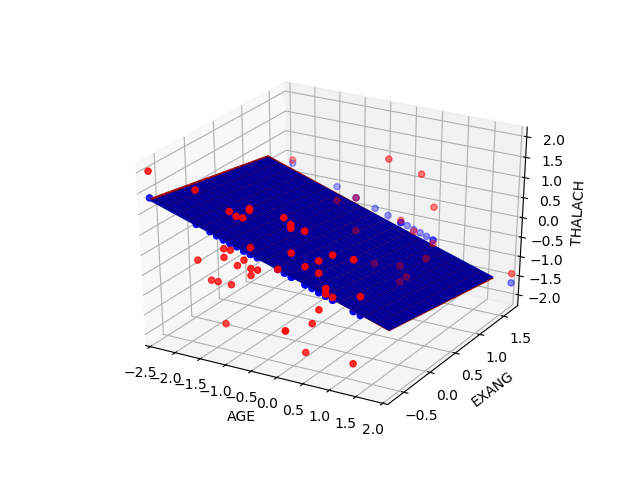

Error: 32.004686889831774


In [25]:
%matplotlib notebook

# Creem figura 3d
from mpl_toolkits.mplot3d import axes3d, Axes3D
# generem dades 3D d'exemple

regr = Regressor(4)
regr2 = LinearRegression()
regr.train(x_train,y_train)
regr2.fit(x_train, y_train)
predX3D = regr.inference(x_val)
predX3D2 = regr2.predict(x_val)
w = regr.w
w2 = regr2.coef_

#Dibuixem
#1r creem una malla acoplada a la zona de punts per tal de representar el pla
malla = (range(20) + 0 * np.ones(20)) / 10 
malla_x1 =  malla * (max(x_val[:,0]) - min(x_val[:,0]))/2 + min(x_val[:,0])
malla_x2 =  malla * (max(x_val[:,3]) - min(x_val[:,3]))/2 + min(x_val[:,3])


#la funcio meshgrid ens aparella un de malla_x1 amb un de malla_x2, per atot
#element de mallax_1 i per a tot element de malla_x2.
xplot, yplot = np.meshgrid(malla_x1 ,malla_x2)


# Cal desnormalitzar les dades
def desnormalitzar(x, mean, std):
    return x * std + mean

#ara creem la superficies que es un pla
zplot = w[1] * xplot + w[4] * yplot + w[0]
zplot2 = w2[0] * xplot + w2[3] * yplot


plt3d = plt.figure('Coeficiente prismatico -- Relacio longitud desplacament 3D', dpi=100.0).gca(projection='3d')
plt3d.set_xlabel('AGE')
plt3d.set_ylabel('EXANG')
plt3d.set_zlabel('THALACH')
plt.xlim(-2.5, 2)
plt.ylim(-0.75, 1.75)
plt3d.plot_surface(xplot,yplot,zplot, color='red')              # Punts amb el talach real
plt3d.plot_surface(xplot,yplot,zplot2, color='blue')            # Punts amb el talach predit
plt3d.scatter(x_val[:,0],x_val[:,3],y_val, color = 'red')       # Superfície calculada amb el nostre regressor
plt3d.scatter(x_val[:,0],x_val[:,3], predX3D, color = 'blue')   # Superfície calculada amb el regressor de la llibreria
print("Error:", regr.cost_list[-1])